In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This project is about an ecommerce company which deals with expensive tech products such as apple products and its accesories or with other tech products. The aim of this project is to determine whether offering discounts to customers is beneficial for company's revenue or not?



In [89]:
# Python Data Analysis imports
import pandas as pd
import numpy as np

# Visualisation imports
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
#importing the data set
#brands
brands = pd.read_csv('/content/drive/MyDrive/clean_eniac_data/brands_cl.csv')
#orderlines
orderlines = pd.read_csv('/content/drive/MyDrive/clean_eniac_data/orderlines_cl.csv')
#orders
orders = pd.read_csv('/content/drive/MyDrive/clean_eniac_data/orders_cl.csv')
#products
products = pd.read_csv('/content/drive/MyDrive/clean_eniac_data/products_cl.csv')

## Products Categorisation

Using products table to generate different categories of products



In [91]:
# products categorisation using string functions
products['category']=pd.np.where(products.desc.str.contains("Macbook"),"Macbook", 
                      pd.np.where(products.desc.str.contains("iMac"),"iMac",
                      pd.np.where(products.desc.str.contains("ipod"),"ipod",
                      pd.np.where(products.desc.str.contains("iPhone"),"IPhone",
                      pd.np.where(products.desc.str.contains("tablet"),"tablet",
                      pd.np.where(products.desc.str.contains("ipad"),"tablet",
                      pd.np.where(products.desc.str.contains("cable"),"cable&adapters",
                      pd.np.where(products.desc.str.contains("adapter"),"cable&adapters",
                      pd.np.where(products.desc.str.contains("case"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("tripod"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("mount"),"cases&mounts&protection", 
                      pd.np.where(products.desc.str.contains("glasses"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("backpack"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("magsafe"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("services"),"service&licences",
                      pd.np.where(products.desc.str.contains("license"),"service&licences", 
                      pd.np.where(products.desc.str.contains("drive"),"components",
                      pd.np.where(products.desc.str.contains("stick"),"components",
                      pd.np.where(products.desc.str.contains("RAM"),"components",
                      pd.np.where(products.desc.str.contains("display"),"components",
                      pd.np.where(products.desc.str.contains("mice"),"components",
                      pd.np.where(products.desc.str.contains("keyboard"),"components",
                      pd.np.where(products.desc.str.contains("pen"),"components",            
                      pd.np.where(products.desc.str.contains("headset"),"components",            
                      pd.np.where(products.desc.str.contains("earphone"),"components",            
                      pd.np.where(products.desc.str.contains("LAN"),"network",
                      pd.np.where(products.desc.str.contains("Wifi"),"network",
                      pd.np.where(products.desc.str.contains("router"),"network",
                      pd.np.where(products.desc.str.contains("NAS"),"network",
                      pd.np.where(products.desc.str.contains("FireWire"),"network",
                      pd.np.where(products.desc.str.contains("GoPro"),"GoPro",
                      pd.np.where(products.desc.str.contains("power"),"Power",
                      pd.np.where(products.desc.str.contains("batter"),"Power",
                      pd.np.where(products.desc.str.contains("watch"),"Watches", 
                      pd.np.where(products.desc.str.contains("second-hand"),"Refurbished products",
                      pd.np.where(products.desc.str.contains("refurbished"),"Refurbished products","other"))))))))))))))))))))))))))))))))))))   
                      #seems not working, should use regex  
productsgrcat=products.groupby(['category']).agg({'category':'count'})

# renaming column names
productsgrcat = productsgrcat.rename(columns  ={"category":"product_count"})
productsgrcat = productsgrcat.reset_index()
productsgrcat = productsgrcat.rename(columns  ={"category":"product_category"})



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Th

In [92]:
productsgrcat

,product_category,product_count
0,GoPro,10
1,IPhone,2945
2,Macbook,191
3,Power,85
4,Refurbished products,18
5,Watches,14
6,cable&adapters,333
7,cases&mounts&protection,279
8,components,2111
9,iMac,545


Text(0, 0.5, 'product_count')

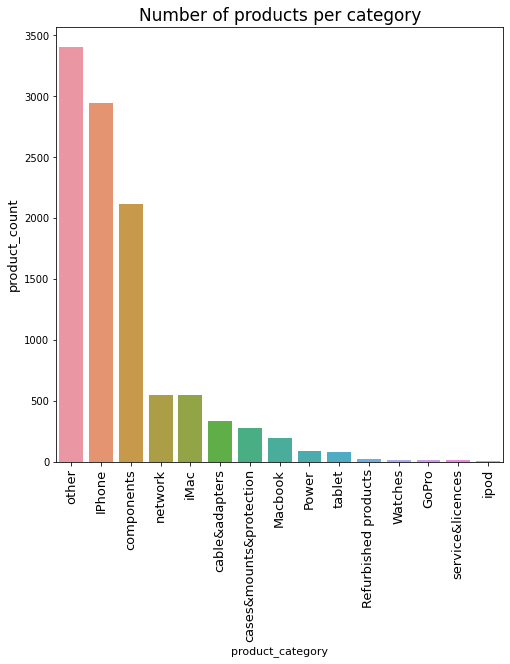

In [151]:
productsgrcat
plt.figure(figsize=(8,8))
# visualising product categories using seaborn 
productsgrcat = productsgrcat.sort_values(by=['product_count'], ascending=False)
sns.barplot(x="product_category", y= "product_count", data=productsgrcat )
plt.title("Number of products per category", fontsize = 17)
plt.xticks(rotation = 90, fontsize = 13)
plt.xlabel("product_category", fontsize = 11)
plt.ylabel("product_count", fontsize = 13)


To make things simpler, combining all the tables into single table






In [94]:
orders.rename(columns = {'order_id':'id_order'}, inplace = True) # changing the coloumn name 

products_sales =(orders
                 .merge(orderlines, how = 'inner', on = 'id_order', suffixes=('', '_remove'))
                 .merge(products, how = 'inner', on = 'sku', suffixes=('', '_remove')))

#removing coloumn with suffix remove
products_sales.drop([i for i in products_sales.columns if 'remove' in i],
               axis=1, inplace=True)

# changing datetime datatype for dates
products_sales['created_date'] = (pd
                                  .to_datetime(products_sales['created_date']))
products_sales['date'] = (pd
                          .to_datetime(products_sales['date']))


In [95]:
# to check the null values and data types
products_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292328 entries, 0 to 292327
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id_order              292328 non-null  int64         
 1   created_date          292328 non-null  datetime64[ns]
 2   total_paid            292328 non-null  float64       
 3   state                 292328 non-null  object        
 4   check_orders          292328 non-null  bool          
 5   id                    292328 non-null  int64         
 6   product_id            292328 non-null  int64         
 7   product_quantity      292328 non-null  int64         
 8   sku                   292328 non-null  object        
 9   unit_price            292328 non-null  float64       
 10  date                  292328 non-null  datetime64[ns]
 11  total_price           292328 non-null  float64       
 12  name                  292328 non-null  object        
 13 

In [96]:
products_sales.isnull().sum()

id_order                     0
created_date                 0
total_paid                   0
state                        0
check_orders                 0
id                           0
product_id                   0
product_quantity             0
sku                          0
unit_price                   0
date                         0
total_price                  0
name                         0
desc                        13
price                     7327
type                       184
max_price_orderlines    285001
category                     0
dtype: int64


## Reviewing total sales of each category 
This can be done by simply filtering the orders with status = "completed"

In [137]:
products_sales_c = products_sales.query('state == "Completed"')
products_total_sales= (
products_sales_c
    .groupby(['category'])
    .agg({'total_price': 'sum'}) 
    .reset_index()
    .sort_values('total_price', ascending=False)
)
products_total_sales

,category,total_price
8,components,6943087.98
12,other,3424109.78
1,IPhone,2871900.46
9,iMac,948222.15
11,network,396607.50
14,tablet,372348.42
6,cable&adapters,346382.76
2,Macbook,140212.17
3,Power,94348.17
7,cases&mounts&protection,62600.73


In [98]:
# to see the total number of categories generated
len(products_total_sales)

15

Distribuition of Product categories based on Revenue generated


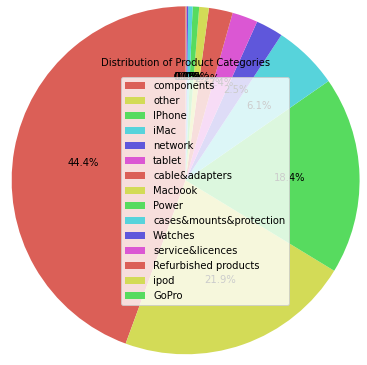

In [99]:
from seaborn.palettes import hls_palette
colors = sns.color_palette('hls')
plt.pie(products_total_sales['total_price'], autopct='%1.1f%%', startangle=90, radius=2 , colors= colors)
plt.legend(products_total_sales['category'], loc="upper right" )
plt.title('Distribution of Product Categories', fontsize = 10)
plt.show()

So, the approach is to apply Pareto rule, which states that there are 20% of the products which contibutes into 80% of the sales of the company.
https://www.dataaxlegenie.com/blog/how-the-pareto-principle-affects-your-sales-prospecting/

Therefore, keeping this in mind this analysis focuses on only top 4 product categories.

Following are the 4 categories selected based on their highest contribuition in company's sales:


1.   Components
2.   Others
3.   iPhones
4.   iMac



# Revenue generated by all products


Determining the revenue generated by product category - "Components":

In [100]:
# components
p_components = products_sales_c.query('category == "components"')
p_components_revenue = (p_components
     .assign(year_month=p_components['date'].dt.strftime('%b-%Y'))
     .assign(year=p_components['date'].dt.strftime('%Y'))
     .assign(month=p_components['date'].dt.strftime('%m'))
     .groupby(['year_month', 'year', 'month'])
     .agg({'total_price': 'sum'})
     .reset_index()
     .sort_values(["year", "month"])
)
p_components_revenue = p_components_revenue.rename(columns={"total_price":"total_price_components"})

Determining the revenue generated by product category - "Others"

In [101]:
# others
p_others = products_sales_c.query('category == "other"')
p_others_revenue = (p_others
     .assign(year_month=p_others['date'].dt.strftime('%b-%Y'))
     .assign(year=p_others['date'].dt.strftime('%Y'))
     .assign(month=p_others['date'].dt.strftime('%m'))
     .groupby(['year_month', 'year', 'month'])
     .agg({'total_price': 'sum'})
     .reset_index()
     .sort_values(["year", "month"])
)
p_others_revenue = p_others_revenue.rename(columns={"total_price":"total_price_others"})

Determining the revenue generated by product category - "iPhones"

In [102]:
# iphone
p_iphone = products_sales_c.query('category == "IPhone"')
p_iphone_revenue = (p_iphone
     .assign(year_month=p_iphone['date'].dt.strftime('%b-%Y'))
     .assign(year=p_iphone['date'].dt.strftime('%Y'))
     .assign(month=p_iphone['date'].dt.strftime('%m'))
     .groupby(['year_month', 'year', 'month'])
     .agg({'total_price': 'sum'})
     .reset_index()
     .sort_values(["year", "month"])
)
p_iphone_revenue=p_iphone_revenue.rename(columns={"total_price":"total_price_iphone"})

Determining the revenue generated  by product category - "iMac"

In [103]:
# imac
p_imac = products_sales_c.query('category == "iMac"')
p_imac_revenue = (p_imac
     .assign(year_month=p_imac['date'].dt.strftime('%b-%Y'))
     .assign(year=p_imac['date'].dt.strftime('%Y'))
     .assign(month=p_imac['date'].dt.strftime('%m'))
     .groupby(['year_month', 'year', 'month'])
     .agg({'total_price': 'sum'})
     .reset_index()
     .sort_values(["year", "month"])
)
p_imac_revenue=p_imac_revenue.rename(columns={"total_price":"total_price_imac"})

In [104]:
# combining all dataframes for discount products
combine_revenue = p_components_revenue.merge(p_imac_revenue, on = "year_month", suffixes=("","_remove")).merge(p_others_revenue, on = "year_month", suffixes=("","_remove")).merge(p_iphone_revenue, on = "year_month", suffixes=("","_remove"))
#removing coloumn with suffix remove
combine_revenue.drop([i for i in combine_revenue.columns if 'remove' in i],
               axis=1, inplace=True)

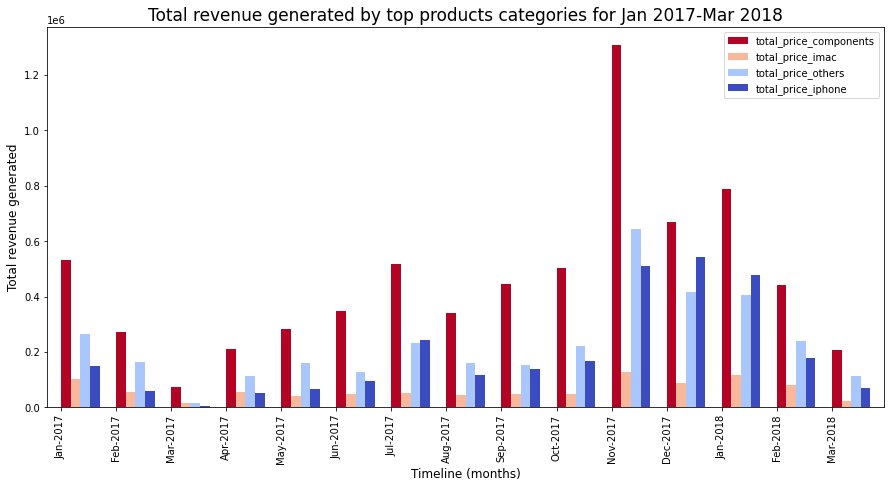

In [160]:
# data visualisation
fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .7

combine_revenue.plot(kind='bar', x= "year_month", ax=ax,width=width, colormap='coolwarm_r',   position=0, label = "Discount")


ax.set_xlabel('Timeline', fontsize = 13)
ax.set_ylabel('Revenue generated', fontsize = 13)



plt.title('Total revenue generated by top products categories for Jan 2017-Mar 2018', fontsize = 17)
plt.xlabel("Timeline (months)", fontsize = 12)
plt.ylabel("Total revenue generated", fontsize = 12);

# Discounts

Finding the discount (%) on items

In [106]:
products_sales_c.drop(labels=['id', 'product_id'], axis=1)

# calculating discounts
products_sales_c['discount'] = products_sales_c.apply(lambda x: x['price'] - x['unit_price'], axis=1)
products_sales_c['discount_percent'] = products_sales_c.apply(lambda x: x['discount']*100/x['price'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Real discounts data has 60062 rows
Unreal discounts are 1680


In [107]:
products_sales_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61742 entries, 5 to 292305
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_order              61742 non-null  int64         
 1   created_date          61742 non-null  datetime64[ns]
 2   total_paid            61742 non-null  float64       
 3   state                 61742 non-null  object        
 4   check_orders          61742 non-null  bool          
 5   id                    61742 non-null  int64         
 6   product_id            61742 non-null  int64         
 7   product_quantity      61742 non-null  int64         
 8   sku                   61742 non-null  object        
 9   unit_price            61742 non-null  float64       
 10  date                  61742 non-null  datetime64[ns]
 11  total_price           61742 non-null  float64       
 12  name                  61742 non-null  object        
 13  desc           

In [114]:
products_sales_c['unreal_discounts'] = products_sales_c.apply(lambda x: x['discount'] < 0, axis=1) # Checking the unreal discount prices
products_sales_c.drop(['unreal_discounts'], axis= 1) # dropped the coloumn unreal discount
#products_sales_c.query("'discount' >= 0")
products_sales_c = products_sales_c.loc[(products_sales_c['discount'] >=0) ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
# percentage discount of each product
products_discount_percent= (
products_sales_c
    .assign(year = products_sales_c['date'].dt.strftime('%Y'))
    .groupby(['category', 'year'])
    .agg({'total_price':'sum','discount_percent':'mean'})
    .reset_index()
    .sort_values('discount_percent', ascending=False) 
    )
products_discount_percent

,category,year,total_price,discount_percent
7,Power,2018,16932.64,53.043786
8,Refurbished products,2017,2297.23,36.164535
14,cases&mounts&protection,2017,48633.36,29.589951
2,IPhone,2017,1861738.34,27.118813
9,Refurbished products,2018,3153.89,25.905836
15,cases&mounts&protection,2018,12899.87,24.644722
3,IPhone,2018,532191.87,24.195854
25,other,2018,733985.77,23.862943
10,Watches,2017,10667.79,22.323258
28,tablet,2017,309341.04,21.293115


In [117]:
#no.of discounted products by category
products_sales_c['discounted_products'] = products_sales_c.apply(lambda x: x['total_paid'] < x['total_price'], axis=1)
products_discount_number = (
products_sales_c
    .assign(year = products_sales_c['date'].dt.strftime('%Y'))
    .assign(months = products_sales_c['date'].dt.strftime('%m'))
    .groupby(['category', 'year'])
    .agg({'discounted_products': 'sum'}) 
    .reset_index()
    .sort_values('discounted_products', ascending=False) 
    )
products_discount_number.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,category,year,discounted_products
24,other,2017,63
2,IPhone,2017,61
16,components,2017,47
3,IPhone,2018,36
25,other,2018,30


# No.of discounted products in each category

In [120]:
# discounted product components
p_cp = products_sales_c.query('category == "components"')
p_cp_products = (p_cp
     .assign(year_month = p_cp['date'].dt.strftime('%b-%Y'))
     #.assign(month = p_cp['date'].dt.strftime('%b'))
    .groupby(['year_month'])
    .agg({'discounted_products': 'count'})
    .reset_index()
    #.sort_values('month', ascending=True)
)


In [121]:
# discounted products iPhone
p_iphone = products_sales_c.query('category == "IPhone"')
p_iphone_products = (p_iphone
     .assign(year_month = p_iphone['date'].dt.strftime('%b-%Y'))
     #.assign(month = p_imac['date'].dt.strftime('%b'))
    .groupby(['year_month'])
    .agg({'discounted_products': 'count'})
    .reset_index()
    #.sort_values('month', ascending=True)
)



In [122]:
# discounted product other
p_others = products_sales_c.query('category == "other"')
p_others_products = (p_others
     .assign(year_month = p_others['date'].dt.strftime('%b-%Y'))
     #.assign(month = p_imac['date'].dt.strftime('%b'))
    .groupby(['year_month'])
    .agg({'discounted_products': 'count'})
    .reset_index()
    #.sort_values('month', ascending=True)
)


In [123]:
# number of discounted iMacs
p_imac = products_sales_c.query('category == "iMac"')
p_imac_products = (p_imac
     .assign(year_month = p_imac['date'].dt.strftime('%b-%Y'))
     #.assign(month = p_imac['date'].dt.strftime('%b'))
    .groupby(['year_month'])
    .agg({'discounted_products': 'count'})
    .reset_index()
    #.sort_values('month', ascending=True)
)
p_imac_products

,year_month,discounted_products
0,Apr-2017,176
1,Aug-2017,244
2,Dec-2017,344
3,Feb-2017,311
4,Feb-2018,307
5,Jan-2017,541
6,Jan-2018,403
7,Jul-2017,273
8,Jun-2017,195
9,Mar-2017,16


# Discount Percent on all products

In [124]:
#components
products_discount_percent_cp= (
p_cp
    .assign(year_month = p_cp['date'].dt.strftime('%b-%Y'))
    .assign(year = p_cp['date'].dt.strftime('%Y'))
    .assign(month = p_cp['date'].dt.strftime('%m'))
    .groupby([ 'year_month','year', 'month'])
    .agg({'discount_percent':'mean'})
    .reset_index()
    .sort_values( ["year", "month"])
)
products_discount_percent_cp = products_discount_percent_cp.rename(columns={"discount_percent":"discount_percent_cp"})   

In [125]:
products_discount_percent_iphone= (
p_iphone
    .assign(year_month = p_iphone['date'].dt.strftime('%b-%Y'))
    .assign(year = p_iphone['date'].dt.strftime('%Y'))
    .assign(month = p_iphone['date'].dt.strftime('%m'))
    .groupby([ 'year_month','year', 'month'])
    .agg({'discount_percent':'mean'})
    .reset_index()
    .sort_values( ["year", "month"])
)
products_discount_percent_iphone=products_discount_percent_iphone.rename(columns={"discount_percent":"discount_percent_iphone"})  

In [126]:
products_discount_percent_others= (
p_others
    .assign(year_month = p_others['date'].dt.strftime('%b-%Y'))
    .assign(year = p_others['date'].dt.strftime('%Y'))
    .assign(month = p_others['date'].dt.strftime('%m'))
    .groupby([ 'year_month','year', 'month'])
    .agg({'discount_percent':'mean'})
    .reset_index()
    .sort_values( ["year", "month"])
)
products_discount_percent_others = products_discount_percent_others.rename(columns={"discount_percent":"discount_percent_others"})  

In [127]:
# iMac
products_discount_percent_imac= (
p_imac
    .assign(year_month = p_imac['date'].dt.strftime('%b-%Y'))
    .assign(year = p_imac['date'].dt.strftime('%Y'))
    .assign(month = p_imac['date'].dt.strftime('%m'))
    .groupby(['year_month','year', 'month'])
    .agg({'discount_percent':'mean'})
    .reset_index()
    .sort_values( ["year", "month"])
)
products_discount_percent_imac=products_discount_percent_imac.rename(columns={"discount_percent":"discount_percent_imac"})  

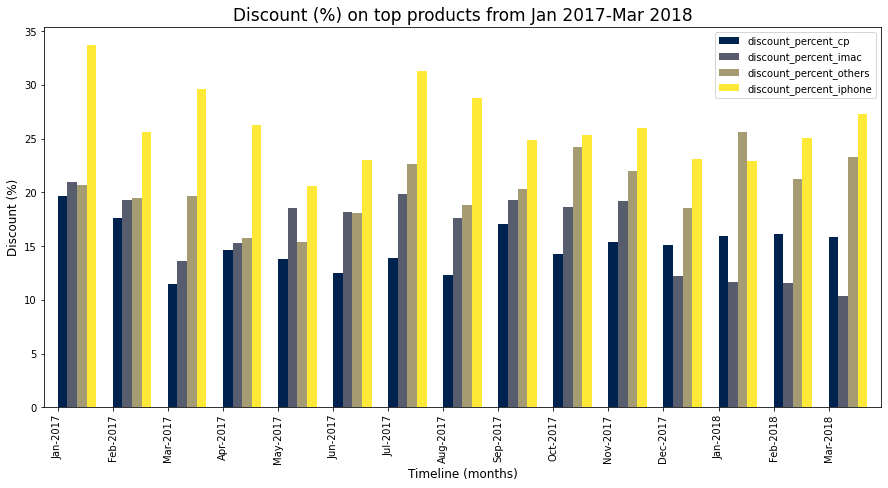

In [179]:
# combining all dataframes for discount products
combine_discount = products_discount_percent_cp.merge(products_discount_percent_imac, on = "year_month", suffixes=("","_remove")).merge(products_discount_percent_others, on = "year_month", suffixes=("","_remove")).merge(products_discount_percent_iphone, on = "year_month", suffixes=("","_remove"))
#removing coloumn with suffix remove
combine_discount.drop([i for i in combine_discount.columns if 'remove' in i],
               axis=1, inplace=True)

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .7

combine_discount.plot(kind='bar', x= "year_month", ax=ax,width=width, colormap='cividis',   position=0, label = "Discount")


ax.set_xlabel('Timeline', fontsize = 13)
ax.set_ylabel('Discount (%)', fontsize = 13)



plt.title('Discount (%) on top products from Jan 2017-Mar 2018', fontsize = 17)
plt.xlabel("Timeline (months)", fontsize = 12)
plt.ylabel("Discount (%)", fontsize = 12);
#fig.savefig("page_views_barplot.png")


In [129]:
combine_discount

,year_month,year,month,discount_percent_cp,discount_percent_imac,discount_percent_others,discount_percent_iphone
0,Jan-2017,2017,01,19.624913,20.972087,20.655618,33.735806
1,Feb-2017,2017,02,17.624952,19.341770,19.470539,25.623849
2,Mar-2017,2017,03,11.434321,13.665146,19.691330,29.674761
3,Apr-2017,2017,04,14.598360,15.255730,15.770613,26.264841
4,May-2017,2017,05,13.821779,18.559437,15.355721,20.599638
5,Jun-2017,2017,06,12.520282,18.135432,18.085978,23.030305
6,Jul-2017,2017,07,13.860438,19.857101,22.625363,31.319634
7,Aug-2017,2017,08,12.281870,17.586870,18.868540,28.759963
8,Sep-2017,2017,09,17.038710,19.334309,20.343571,24.879140
9,Oct-2017,2017,10,14.254593,18.611325,24.214706,25.324523


In [130]:
#combining revenue and discounts on imac.assign(month = products_discount_percent_imac['date'].dt.strftime('%m')).sort_values('month', ascending=True)
combined = products_discount_percent_imac.merge(p_imac_revenue, how = "inner", on = "year_month")
combined.drop(["month_y", "year_y"], axis =1)

,year_month,year_x,month_x,discount_percent_imac,total_price_imac
0,Jan-2017,2017,01,20.972087,103543.46
1,Feb-2017,2017,02,19.341770,55211.53
2,Mar-2017,2017,03,13.665146,14018.40
3,Apr-2017,2017,04,15.255730,56784.50
4,May-2017,2017,05,18.559437,39287.58
5,Jun-2017,2017,06,18.135432,48867.42
6,Jul-2017,2017,07,19.857101,52743.11
7,Aug-2017,2017,08,17.586870,44114.72
8,Sep-2017,2017,09,19.334309,48699.50
9,Oct-2017,2017,10,18.611325,49027.35


# Vizualisation of top product categories

Text(0.5, 1.0, '"iMac" - Evolution of Revenue and Average Discount')

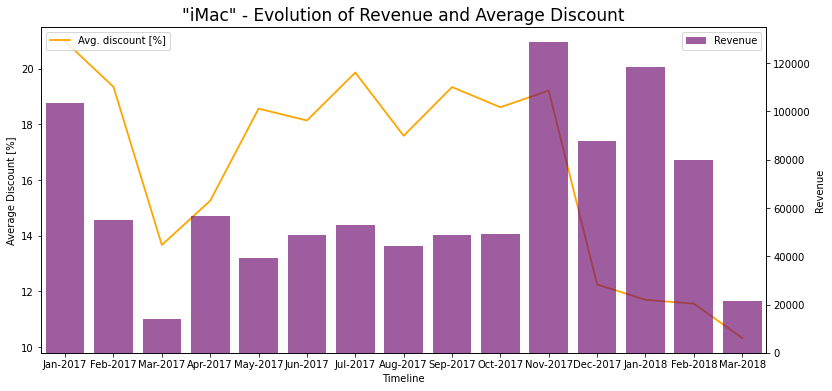

In [131]:
combined = products_discount_percent_imac.merge(p_imac_revenue, how = "inner", on = "year_month")
combined.drop(["month_y", "year_y"], axis =1)  ######new dataframe

#year_months = ['Jan 2017', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 
          #'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017', 'Jan 2018', 'Feb 2018', 'Mar 2018' ]


ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(13,6))
width = .3
height=20

sns.lineplot(data = combined['discount_percent_imac'], linewidth=1.8 , color = "orange", sort = False, ax=ax1, label="Avg. discount [%]")
ax2 = ax1.twinx()

sns.barplot(data = combined, x='year_month', y='total_price_imac',  color = "purple",  alpha = 0.68, ax=ax2, label="Revenue")

ax1.set_xlabel("Timeline")
ax1.set_ylabel("Average Discount [%]")
ax2.set_ylabel("Revenue")

ax1.tick_params(axis="y")
ax1.ticklabel_format(style="plain", axis="y")
ax1.legend(loc=2)

ax2.tick_params(axis="y")
ax2.ticklabel_format(style="plain", axis="y")
ax2.legend(loc=1)



plt.title('"iMac" - Evolution of Revenue and Average Discount', fontsize = 17)


Text(0.5, 1.0, '"Components" - Evolution of Revenue and Average Discount')

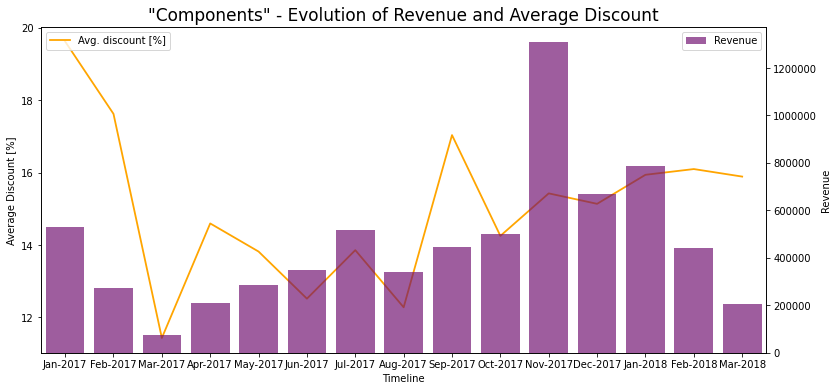

In [132]:
combined = products_discount_percent_cp.merge(p_components_revenue, how = "inner", on = "year_month")
combined.drop(["month_y", "year_y"], axis =1)  ######new dataframe

#year_months = ['Jan 2017', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 
          #'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017', 'Jan 2018', 'Feb 2018', 'Mar 2018' ]


ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(13,6))
width = .3
height=20

sns.lineplot(data = combined['discount_percent_cp'], linewidth=1.8 , color = "orange", sort = False, ax=ax1, label="Avg. discount [%]")
ax2 = ax1.twinx()

sns.barplot(data = combined, x='year_month', y='total_price_components',  color = "purple",  alpha = 0.68, ax=ax2, label="Revenue")

ax1.set_xlabel("Timeline")
ax1.set_ylabel("Average Discount [%]")
ax2.set_ylabel("Revenue")

ax1.tick_params(axis="y")
ax1.ticklabel_format(style="plain", axis="y")
ax1.legend(loc=2)

ax2.tick_params(axis="y")
ax2.ticklabel_format(style="plain", axis="y")
ax2.legend(loc=1)



plt.title('"Components" - Evolution of Revenue and Average Discount', fontsize = 17)


Text(0.5, 1.0, '"Others" - Evolution of Revenue and Average Discount')

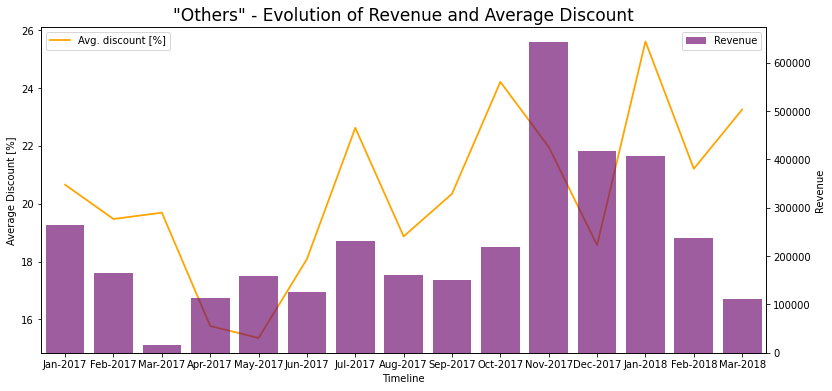

In [133]:
combined = products_discount_percent_others.merge(p_others_revenue, how = "inner", on = "year_month")
combined.drop(["month_y", "year_y"], axis =1)  ######new dataframe

#year_months = ['Jan 2017', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 
          #'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017', 'Jan 2018', 'Feb 2018', 'Mar 2018' ]


ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(13,6))
width = .3
height=20

sns.lineplot(data = combined['discount_percent_others'], linewidth=1.8 , color = "orange", sort = False, ax=ax1, label="Avg. discount [%]")
ax2 = ax1.twinx()

sns.barplot(data = combined, x='year_month', y='total_price_others',  color = "purple",  alpha = 0.68, ax=ax2, label="Revenue")

ax1.set_xlabel("Timeline")
ax1.set_ylabel("Average Discount [%]")
ax2.set_ylabel("Revenue")

ax1.tick_params(axis="y")
ax1.ticklabel_format(style="plain", axis="y")
ax1.legend(loc=2)

ax2.tick_params(axis="y")
ax2.ticklabel_format(style="plain", axis="y")
ax2.legend(loc=1)



plt.title('"Others" - Evolution of Revenue and Average Discount', fontsize = 17)


Text(0.5, 1.0, '"iPhone" - Evolution of Revenue and Average Discount')

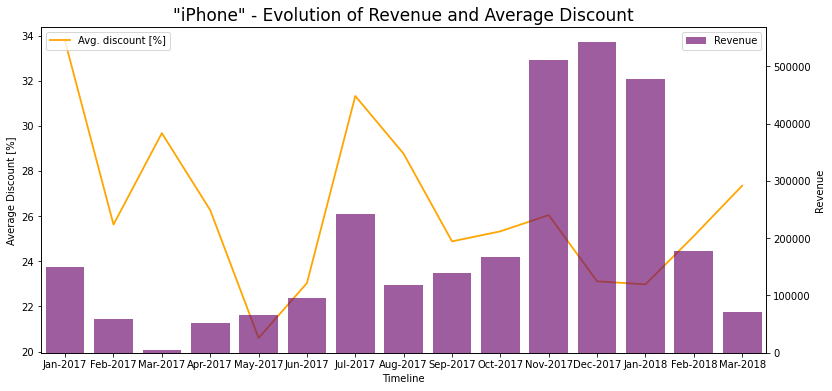

In [134]:
combined = products_discount_percent_iphone.merge(p_iphone_revenue, how = "inner", on = "year_month")
combined.drop(["month_y", "year_y"], axis =1)  ######new dataframe

#year_months = ['Jan 2017', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 
          #'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017', 'Jan 2018', 'Feb 2018', 'Mar 2018' ]


ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(13,6))
width = .3
height=20

sns.lineplot(data = combined['discount_percent_iphone'], linewidth=1.8 , color = "orange", sort = False, ax=ax1, label="Avg. discount [%]")
ax2 = ax1.twinx()

sns.barplot(data = combined, x='year_month', y='total_price_iphone',  color = "purple",  alpha = 0.68, ax=ax2, label="Revenue")

ax1.set_xlabel("Timeline")
ax1.set_ylabel("Average Discount [%]")
ax2.set_ylabel("Revenue")

ax1.tick_params(axis="y")
ax1.ticklabel_format(style="plain", axis="y")
ax1.legend(loc=2)

ax2.tick_params(axis="y")
ax2.ticklabel_format(style="plain", axis="y")
ax2.legend(loc=1)



plt.title('"iPhone" - Evolution of Revenue and Average Discount', fontsize = 17)
